In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib
import sklearn
import torch
import random
import torch.nn as nn
from matplotlib import pyplot as plt
from pandas import DataFrame
from scipy import stats
from IPython.display import display
import yfinance as yf
from sklearn.decomposition import PCA
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



In [36]:
# I initialize bold settings which I will use in my print statements for better readability
# initializing bold and end to make our print messages bold 
BOLD = '\033[1m'
END = '\033[0m'

# Q1

In [37]:
DJIA_tickers = [
    "AAPL", "AMGN", "AMZN", "AXP", "BA", "CAT", "CRM", "CSCO", "CVX",
    "DIS", "GS", "HD", "HON", "IBM", "JNJ", "JPM",
    "KO", "MCD", "MMM", "MRK", "MSFT", "NKE", "NVDA", "PG",
    "SHW", "TRV", "UNH", "V", "VZ", "WMT"
]

data = yf.download(DJIA_tickers, period="2y", interval="1d")
data.to_pickle("djia_data_2y.pkl")
data = pd.read_pickle("djia_data_2y.pkl")



closing_prices = data['Close']
display(closing_prices)
display(closing_prices.isnull().sum())
# now lets drop the missing values

closing_prices = closing_prices.dropna(axis=1, how='all')
closing_prices = closing_prices.dropna(how='all')




C:\Users\guyga\AppData\Local\Temp\ipykernel_5196\2387678179.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(DJIA_tickers, period="2y", interval="1d")
[*********************100%***********************]  30 of 30 completed


Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-29,187.598312,250.622879,146.320007,163.685654,224.429993,241.859924,227.952148,45.365368,131.853928,90.983246,...,373.284363,106.337021,48.111645,143.663330,269.048523,171.211792,515.769897,250.522141,33.120697,50.838009
2023-11-30,188.172882,253.480698,146.089996,166.950958,231.630005,243.091293,249.277802,45.676941,131.569885,91.170128,...,373.343536,106.240654,46.742455,145.935287,274.041840,174.280167,533.113953,252.936386,33.620667,50.710979
2023-12-01,189.450851,256.122314,147.029999,169.874069,233.869995,248.947540,257.293518,45.761909,132.678528,91.061928,...,369.008148,109.701462,46.737453,145.117752,277.511627,175.592422,529.312134,252.709793,33.839954,50.271255
2023-12-04,187.657745,256.206909,144.839996,169.375488,234.869995,246.998672,248.050720,45.365368,132.733490,90.501274,...,363.717041,111.315842,45.483189,144.547394,276.656433,176.759964,530.395691,250.729080,33.366299,50.258228
2023-12-05,191.610443,254.636963,146.880005,166.862946,234.160004,247.425293,248.406967,45.252079,130.891876,89.301285,...,367.047363,111.567192,46.542664,139.509247,278.170166,177.213470,532.311035,250.896591,33.699608,50.724007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-21,271.489990,337.540009,220.690002,352.890015,179.699997,550.429993,227.110001,76.099998,149.979996,104.279999,...,472.119995,62.799999,178.880005,150.919998,337.059998,290.070007,319.970001,327.980011,41.230000,105.320000
2025-11-24,275.920013,334.299988,226.279999,355.929993,179.119995,559.599976,226.820007,76.239998,149.750000,101.940002,...,474.000000,61.930000,182.550003,146.979996,338.000000,290.839996,319.049988,329.299988,40.209999,104.059998
2025-11-25,276.970001,341.109985,229.669998,362.640015,182.440002,566.609985,234.119995,76.320000,148.529999,103.309998,...,476.989990,63.680000,177.820007,148.490005,342.649994,293.700012,326.279999,334.529999,40.590000,107.000000


Ticker
AAPL    0
AMGN    0
AMZN    0
AXP     0
BA      0
CAT     0
CRM     0
CSCO    0
CVX     0
DIS     0
GS      0
HD      0
HON     0
IBM     0
JNJ     0
JPM     0
KO      0
MCD     0
MMM     0
MRK     0
MSFT    0
NKE     0
NVDA    0
PG      0
SHW     0
TRV     0
UNH     0
V       0
VZ      0
WMT     0
dtype: int64

# 1.2

In [38]:
# we first make a copy 
prices = closing_prices.copy()

# now we compute log returns, we use log price minus log of previous day price
daily_log_returns = np.log(prices) - np.log(prices.shift(1))

# here we drop columns that are full NaN, like they don't have any data at all
daily_log_returns = daily_log_returns.dropna(axis=1, how='all')

# again we drop all-NaN columns just to double clean the data
daily_log_returns = daily_log_returns.dropna(axis=1, how='all')

# here we keep only tickers that have more than 1 valid value, so PCA and corr can work
daily_log_returns = daily_log_returns.loc[:, daily_log_returns.count() > 1]

# now we remove infinity values because log(0) or errors give inf, and it breaks our maths
daily_log_returns = daily_log_returns.replace([np.inf, -np.inf], np.nan)

# finally we drop any rows that still have NaNs, so we get clean data for correlation and PCA
daily_log_returns = daily_log_returns.dropna()

display(daily_log_returns.head())


Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-30,0.003058,0.011338,-0.001573,0.019752,0.031577,0.005078,0.089432,0.006845,-0.002157,0.002052,...,0.000159,-0.000907,-0.028871,0.015691,0.018389,0.017763,0.033074,0.009591,0.014983,-0.002502
2023-12-01,0.006769,0.010367,0.006414,0.017357,0.009624,0.023805,0.031650,0.001858,0.008391,-0.001187,...,-0.011680,0.032056,-0.000107,-0.005618,0.012582,0.007501,-0.007157,-0.000896,0.006501,-0.008709
2023-12-04,-0.009510,0.000330,-0.015007,-0.002939,0.004267,-0.007859,-0.036584,-0.008703,0.000414,-0.006176,...,-0.014443,0.014609,-0.027203,-0.003938,-0.003086,0.006627,0.002045,-0.007869,-0.014096,-0.000259
2023-12-05,0.020845,-0.006147,0.013986,-0.014945,-0.003027,0.001726,0.001435,-0.002500,-0.013972,-0.013348,...,0.009115,0.002255,0.023027,-0.035477,0.005457,0.002562,0.003605,0.000668,0.009940,0.009225
2023-12-06,-0.005703,-0.005627,-0.016198,-0.018747,0.011591,0.003052,-0.007558,-0.004810,-0.002313,0.007790,...,-0.010036,0.006047,-0.023093,-0.000750,0.013024,-0.002890,-0.001327,-0.001258,0.002080,-0.010912


Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.247710,0.483877,0.418273,0.342292,0.362437,0.327071,0.403792,0.302707,0.342024,...,0.482060,0.358830,0.348509,0.133148,0.364272,0.190414,0.014316,0.398956,0.081046,0.290520
AMGN,0.247710,1.000000,0.088006,0.242171,0.095019,0.229430,0.142375,0.225577,0.219689,0.182238,...,0.082697,0.170079,0.036709,0.267276,0.280429,0.193221,0.162522,0.283575,0.278951,0.104393
AMZN,0.483877,0.088006,1.000000,0.511568,0.393155,0.440777,0.456949,0.413448,0.263502,0.364710,...,0.636476,0.316819,0.507861,-0.047159,0.289796,0.109931,0.033499,0.345825,-0.095186,0.256728
AXP,0.418273,0.242171,0.511568,1.000000,0.436652,0.562227,0.402430,0.506011,0.427752,0.526277,...,0.418236,0.343032,0.338728,0.087844,0.421090,0.384789,0.112537,0.542727,0.069739,0.314815
BA,0.342292,0.095019,0.393155,0.436652,1.000000,0.291955,0.256670,0.301890,0.285556,0.297703,...,0.267557,0.299742,0.232041,0.012775,0.267276,0.163283,0.038849,0.279842,-0.047278,0.233106


 Pearson Correlation Heatmap


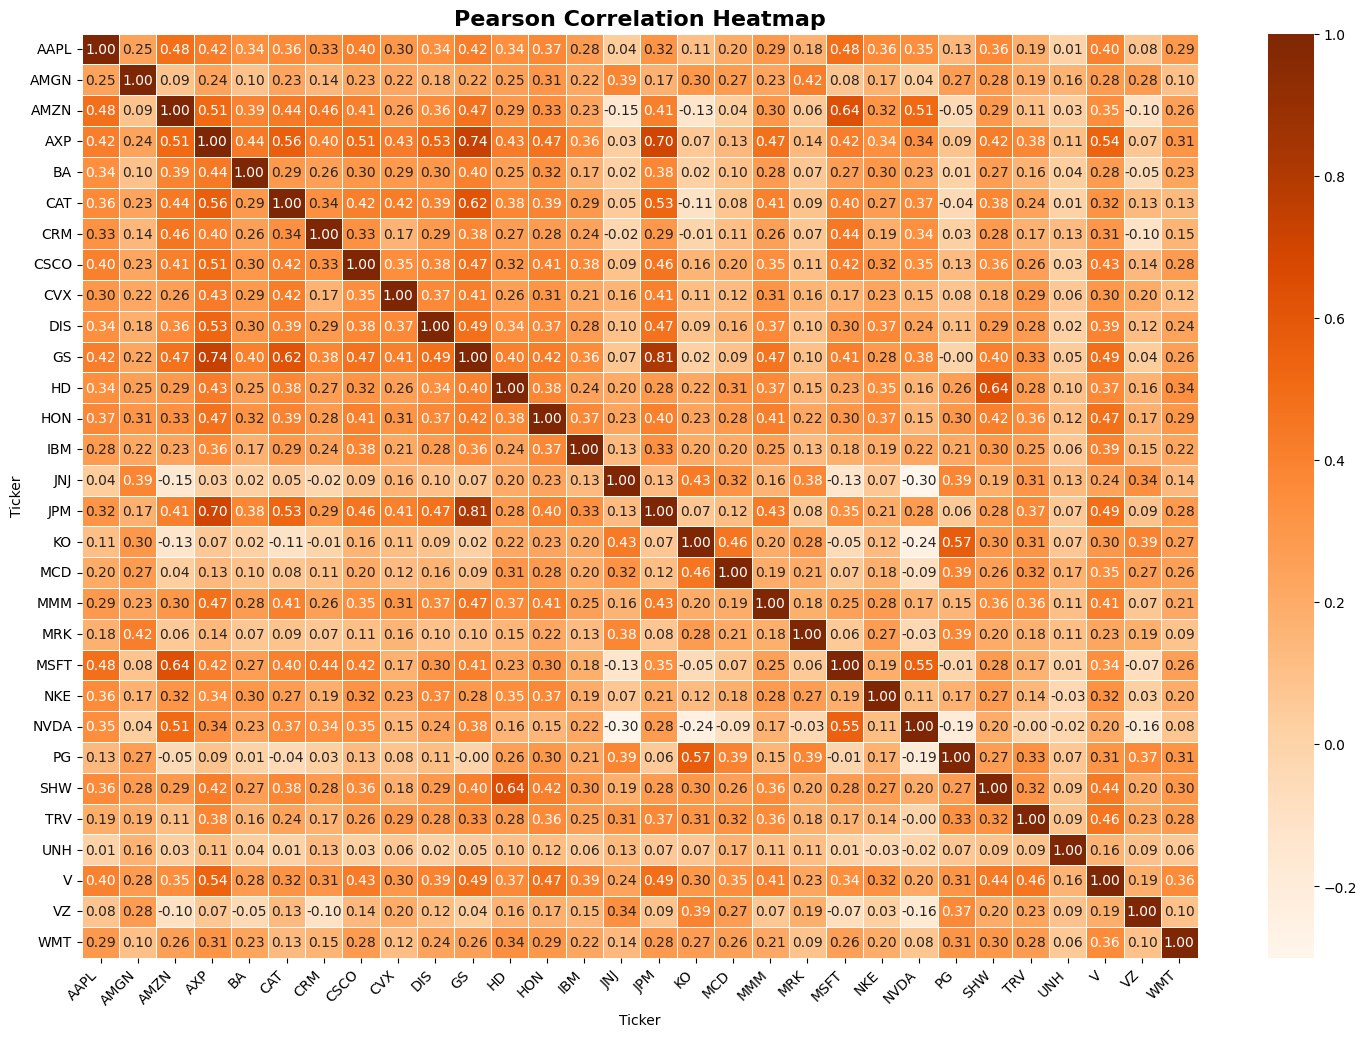

In [39]:
# Now we calculate the Pearson correlation matrix
correlation_matrix = daily_log_returns.corr(method='pearson',numeric_only=True)
display(correlation_matrix.head())

# Now we plot the heatmap
plt.figure(figsize=(18, 12)) 
print(f"{BOLD} Pearson Correlation Heatmap{END}")
sns.heatmap(correlation_matrix, annot=True,fmt='.2f',cmap='Oranges',linewidths=0.5)
plt.title("Pearson Correlation Heatmap", fontsize=16,fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()



# 1.3

Eigenvalues:


array([8.74790919, 3.60620006, 1.46256929, 1.22216267, 1.13511205,
       1.02646414, 0.98239008, 0.85193655, 0.82183409, 0.75790727,
       0.71027533, 0.66420592, 0.64486278, 0.60675145, 0.60422782,
       0.59614795, 0.56664971, 0.54362824, 0.52985521, 0.5159177 ,
       0.4836312 , 0.43253544, 0.40252394, 0.39194329, 0.38420805,
       0.35417421, 0.29737496, 0.2619272 , 0.24300454, 0.15166969])


Eigenvectors (sorted):


array([[-2.10345265e-01, -6.76629008e-02,  2.51277899e-01,
        -1.34572130e-01,  1.11787268e-01, -1.33642911e-01,
         6.28793269e-02, -2.20203316e-01, -9.55583611e-02,
         3.02420260e-02,  8.45298123e-02,  7.17905909e-02,
         1.19633987e-01, -1.12518561e-01, -1.04074727e-01,
        -1.28164521e-01, -3.20755940e-01, -3.12147833e-01,
         5.04083402e-01,  1.59514245e-01,  1.57446523e-02,
        -4.23894199e-01,  1.58741266e-01,  3.21333966e-02,
         7.32578192e-02,  2.46620582e-02,  7.94526229e-02,
        -8.74293396e-02,  1.73330803e-02,  6.54801271e-02],
       [-1.39114908e-01,  1.99027613e-01, -2.76023636e-02,
        -4.79020191e-01, -1.39095605e-01, -7.37310766e-02,
        -4.36322389e-02,  6.40094819e-02, -5.11930599e-02,
         2.12938847e-01,  1.43778972e-01, -2.01752891e-01,
         2.84999017e-01, -3.23910624e-02, -5.89383501e-02,
         3.84562864e-02, -2.51475791e-01, -7.67985768e-02,
        -8.45529775e-02, -5.31676640e-01, -2.03826859e-

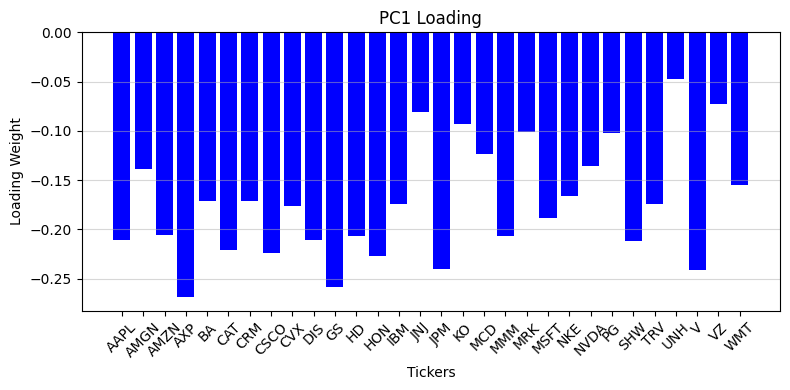

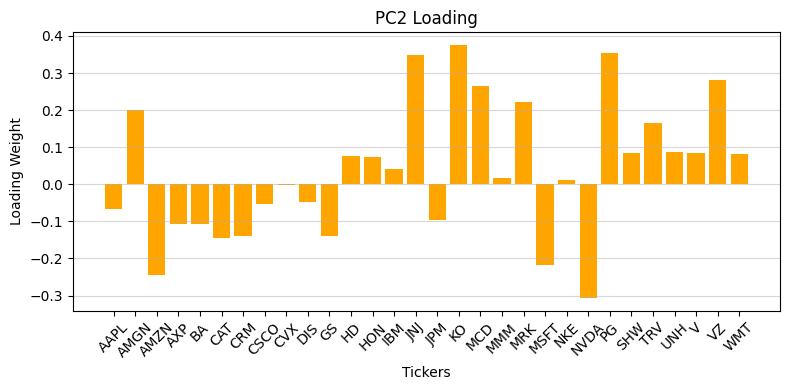

In [40]:
# eigendecomposition

# we change it to a numpy array so we can do eigendecomposition
matrix_X = correlation_matrix.values

# here we use eigh because the correlation matrix is symmetric
# eigh also gives correct & stable eigenvalues for PCA
eigenvalues, eigenvectors = np.linalg.eigh(matrix_X)

# now we sort eigenvalues in descending order (largest = PC1)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# we print them to see the principal components stuff
print(f"{BOLD}Eigenvalues:{END}")
display(eigenvalues)

print(f"\n{BOLD}Eigenvectors (sorted):{END}")
display(eigenvectors)


# Now lets perform PCA to the standardized daily_log_returns 
scaler = StandardScaler()
X_standardized = scaler.fit_transform(daily_log_returns)  

# Then perform PCA on the standardized daily_log_returns
pca = PCA()
pca.fit(X_standardized) 

# here we take the correct eigenvectors for PC1 and PC2
pc1_loadings = eigenvectors[:, 0]
pc2_loadings = eigenvectors[:, 1]

DJIA_tickers_val = correlation_matrix.columns


# Now we plot PC1 LOADING
plt.figure(figsize=(8, 4))
plt.bar(DJIA_tickers_val, pc1_loadings, color='blue')
plt.xticks(rotation=45)
plt.xlabel("Tickers")
plt.ylabel("Loading Weight")
plt.title("PC1 Loading")
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


# Now we plot PC2 LOADING
plt.figure(figsize=(8, 4))
plt.bar(DJIA_tickers_val, pc2_loadings, color='orange')
plt.xticks(rotation=45)
plt.xlabel("Tickers")
plt.ylabel("Loading Weight")
plt.title("PC2 Loading")
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


# 1.4

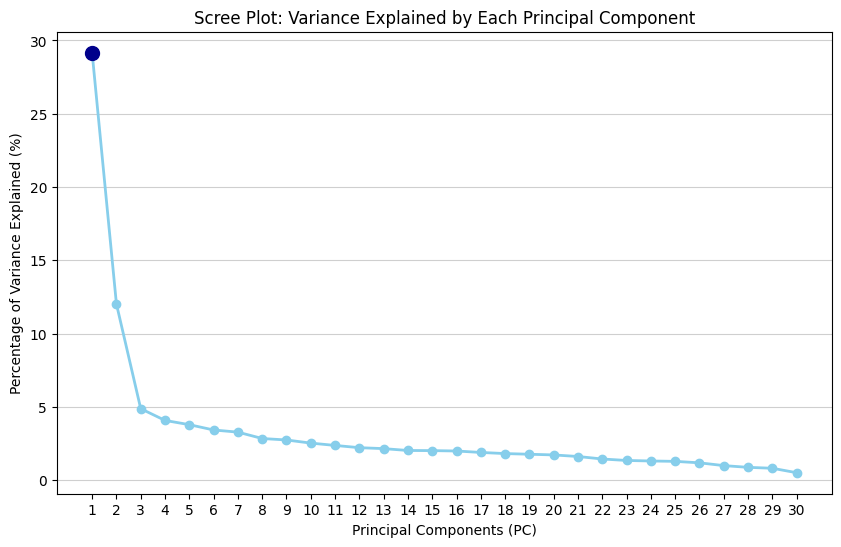

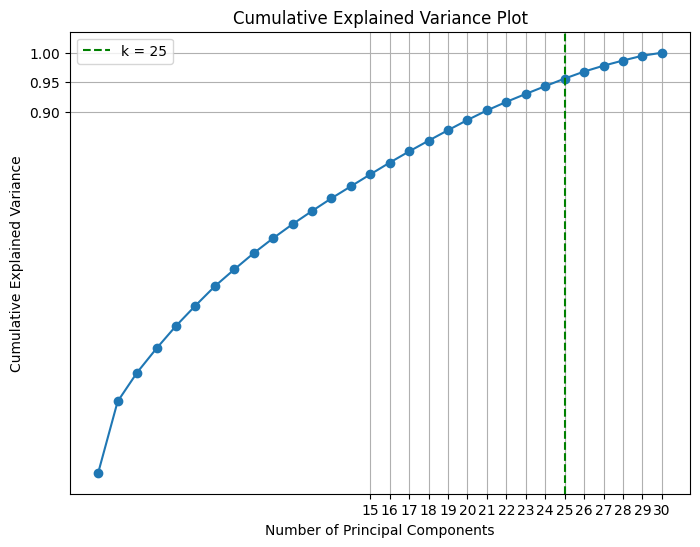

In [ ]:
# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
pc_indices = np.arange(1, len(explained_variance_ratio) + 1)

plt.figure(figsize=(10, 6))

# Scree plot 
plt.plot(pc_indices, explained_variance_ratio * 100,marker='o', linestyle='-', color='skyblue', linewidth=2)

# Highlight PC1 with a darker color
plt.plot(1, explained_variance_ratio[0] * 100,marker='o', color='darkblue', markersize=10)

plt.xlabel('Principal Components (PC)')
plt.ylabel('Percentage of Variance Explained (%)')
plt.title('Scree Plot: Variance Explained by Each Principal Component')
plt.xticks(pc_indices)
plt.grid(axis='y', alpha=0.6)
plt.show()



In [42]:
print("Explained variance ratio (PC1, PC2, ...):")
print(pca.explained_variance_ratio_)
print("PC1 explains {:.2%}".format(pca.explained_variance_ratio_[0]))


Explained variance ratio (PC1, PC2, ...):
[0.29159697 0.12020667 0.04875231 0.04073876 0.03783707 0.03421547
 0.03274634 0.02839788 0.02739447 0.02526358 0.02367584 0.0221402
 0.02149543 0.02022505 0.02014093 0.0198716  0.01888832 0.01812094
 0.01766184 0.01719726 0.01612104 0.01441785 0.01341746 0.01306478
 0.01280693 0.01180581 0.0099125  0.00873091 0.00810015 0.00505566]
PC1 explains 29.16%


# Q2

# 2.2

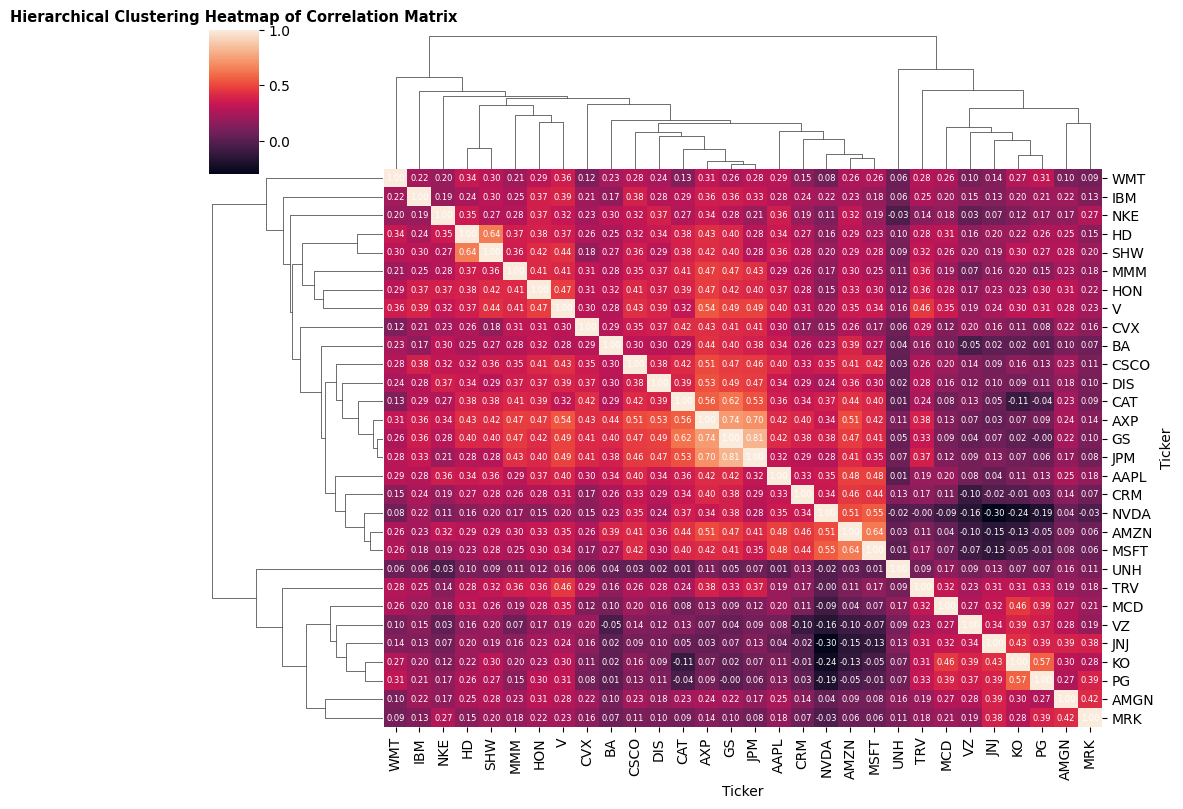

Four most distinct blocks of correlation on the diagonal:


1                    [AMGN, JNJ, KO, MCD, MRK, PG, VZ]
2    [AAPL, AMZN, AXP, BA, CAT, CRM, CSCO, CVX, DIS...
3                                                [WMT]
4                                                [UNH]
dtype: object

Three most distinct blocks of correlation on the diagonal:


1                    [AMGN, JNJ, KO, MCD, MRK, PG, VZ]
2    [AAPL, AMZN, AXP, BA, CAT, CRM, CSCO, CVX, DIS...
3                                                [UNH]
dtype: object

In [43]:

# clustered heatmap with annotations added manually
clustered = sns.clustermap(correlation_matrix,metric="correlation",method="average",cmap="rocket",figsize=(10, 8),annot=False)

# get the reordered matrix from the clustergrid
reordered_corr = correlation_matrix.iloc[clustered.dendrogram_row.reordered_ind,clustered.dendrogram_col.reordered_ind]

# add annotations manually using WHILE loops
ax = clustered.ax_heatmap
i = 0
while i < reordered_corr.shape[0]:
    j = 0
    while j < reordered_corr.shape[1]:
        ax.text(
            j + 0.5, i + 0.5,
            f"{reordered_corr.iloc[i, j]:.2f}",
            ha='center', va='center',
            color='white',
            fontsize=6
        )
        j += 1
    i += 1
plt.title('Hierarchical Clustering Heatmap of Correlation Matrix',fontsize=10.5,fontweight='bold')
plt.show()

# lets calculate distance as 1 - absolute correlation
distance_matrix = 1 - np.abs(correlation_matrix)
# next we convert the square matrix to a condensed format
condensed_distance = squareform(distance_matrix.values)
# we conduct a hierarchical clustering with the average combination method
combined = linkage(condensed_distance, 'average')
#display(distance_matrix.head())

# now we split the dendrogram into 4 clusters
cluster_labels = fcluster(combined, 4, criterion='maxclust')

# Now we have to map tickers to cluster numbers
print(f"{BOLD}Four most distinct blocks of correlation on the diagonal:{END}")
clusters_1 = pd.Series(cluster_labels, index=correlation_matrix.columns)
groups_1 = clusters_1.groupby(clusters_1).apply(lambda x: x.index.tolist())
display(groups_1)

# now we split the dendrogram into 3 clusters
cluster_labels = fcluster(combined, 3, criterion='maxclust')

# Now we have to map tickers to cluster numbers
print(f"{BOLD}Three most distinct blocks of correlation on the diagonal:{END}")
clusters = pd.Series(cluster_labels, index=correlation_matrix.columns)
groups = clusters.groupby(clusters).apply(lambda x: x.index.tolist())
display(groups)



# 2.3

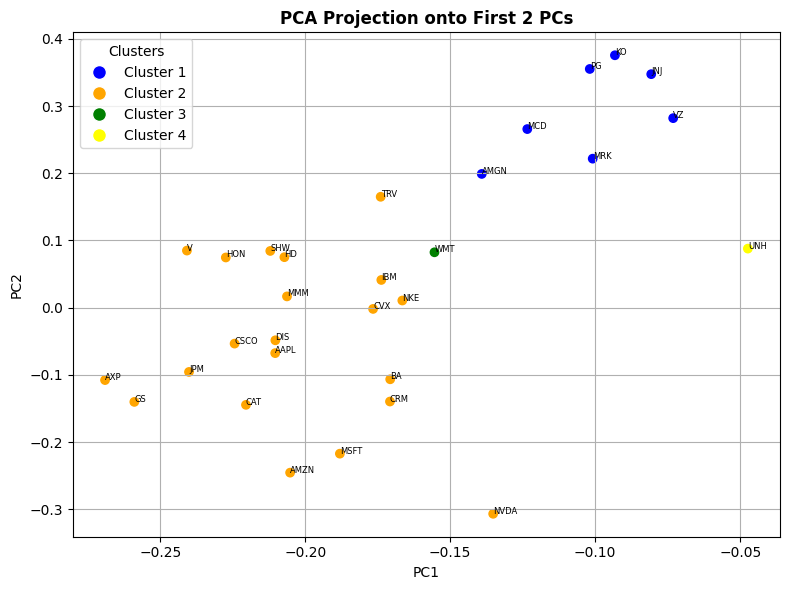

In [44]:
# here we get cluster colors
color_map = {ticker: {1:'blue', 2:'orange', 3:'green', 4:'yellow'}[clusters_1[ticker]] for ticker in correlation_matrix.columns}
colors = [color_map[t] for t in correlation_matrix.columns]


plt.figure(figsize=(8,6))

# scatter plot of first two PCs
plt.scatter(pc1_loadings,pc2_loadings, c=colors)

# annotate each point with its ticker
i = 0
tickers = list(correlation_matrix.columns)
while i < len(tickers):
    ticker = tickers[i]
    plt.annotate(ticker, (pc1_loadings[i], pc2_loadings[i]), fontsize=6)
    i += 1

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection onto First 2 PCs",fontweight='bold')
plt.grid()
plt.tight_layout()
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0],[0], marker='o', color='w', label='Cluster 1', markerfacecolor='blue', markersize=10),
    Line2D([0],[0], marker='o', color='w', label='Cluster 2', markerfacecolor='orange', markersize=10),
    Line2D([0],[0], marker='o', color='w', label='Cluster 3', markerfacecolor='green', markersize=10),
    Line2D([0],[0], marker='o', color='w', label='Cluster 4', markerfacecolor='yellow', markersize=10)
]

plt.legend(handles=legend_elements, title="Clusters")
plt.show()



# Q3

# 3.1


ADF Test on CVX Monthly Closing Price
ADF Statistic: 0.5195153391861603
p-value: 0.9854543335556643
Note: when the p-value < 0.05 means that the series is stationary, thus no differencing needed
The series is not stationary, so we fail to reject the null
Conclusion: Differencing is required (d=1 or higher)

Visual proof for stationarity check:


<Figure size 1000x500 with 0 Axes>

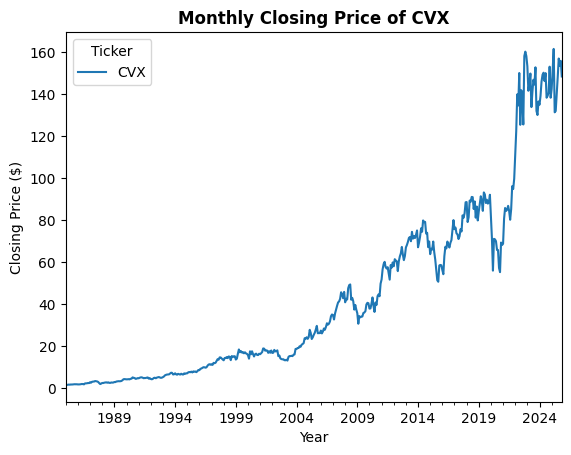

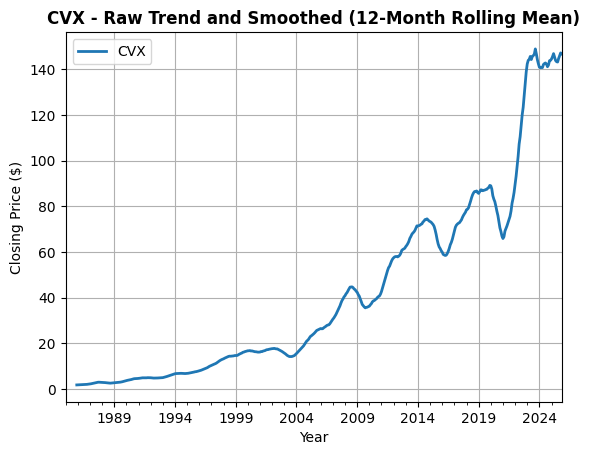

<Figure size 1000x500 with 0 Axes>

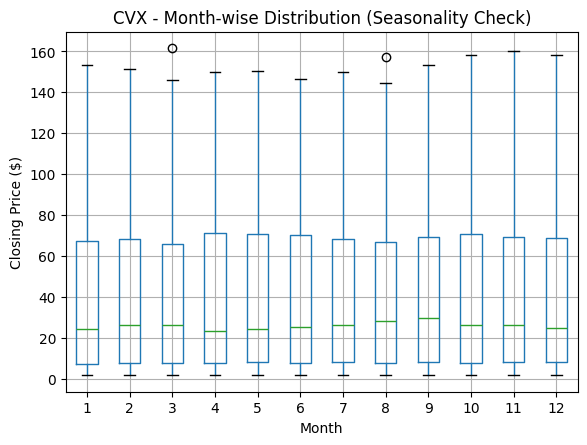


Testing differencing order d=0
ADF Statistic: 0.5195153391861603
p-value: 0.9854543335556643

Testing differencing order d=1
ADF Statistic: -4.927799029603802
p-value: 3.077997358814539e-05
Series is stationary at d=1, Use d=1 in ARIMA/SARIMA.


<Figure size 1000x500 with 0 Axes>

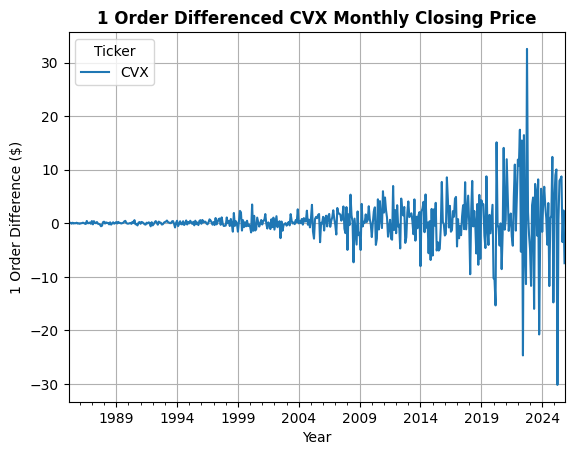

<Figure size 1000x500 with 0 Axes>

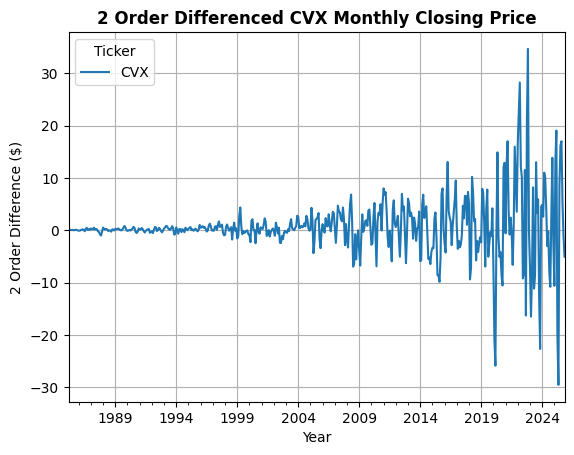

In [45]:
# oldest DJIA stock
old_ticker = "CVX"

# here we load the saved CVX data to avoid calling yfinance again
cvx_monthly = pd.read_pickle("cvx_monthly.pkl")
cvx_monthly.head()

# 1. ADF Test (stationarity check)

adf_outcome = adfuller(cvx_monthly)
print(f"\n{BOLD}ADF Test on CVX Monthly Closing Price{END}")
print(f"{BOLD}ADF Statistic:{END} {adf_outcome[0]}")
print(f"{BOLD}p-value:{END} {adf_outcome[1]}")
print(f"{BOLD}Note:{END} when the p-value < 0.05 means that the series is stationary, thus no differencing needed")

if adf_outcome[1] < 0.05:
    print(f"{BOLD}The series is stationary, so we reject the null{END}")
    print(f"{BOLD}Conclusion:{END} No differencing required (d=0)")
else:
    print(f"{BOLD}The series is not stationary, so we fail to reject the null{END}")
    print(f"{BOLD}Conclusion:{END} Differencing is required (d=1 or higher)")


# seasonality / behavior 
#    here we use rolling mean + month-wise distribution

rolling_window = 12   # 12 months = 1 year

plt.figure(figsize=(10,5))
# visual proof
print(f"\n{BOLD}Visual proof for stationarity check:{END}")
cvx_monthly.plot()
plt.xlabel("Year")
plt.ylabel("Closing Price ($)")
plt.title("Monthly Closing Price of CVX", fontweight='bold')
plt.show()

cvx_monthly.rolling(window=rolling_window).mean().plot(label="12-Month Rolling Mean", linewidth=2)
plt.title("CVX - Raw Trend and Smoothed (12-Month Rolling Mean)", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Closing Price ($)")
plt.legend()
plt.grid(True)
plt.show()
# month-wise distribution (seasonality check)

# if cvx_monthly is a DataFrame → rename its only column
cvx_df = cvx_monthly.copy()
cvx_df.columns = ["price"]

cvx_df["month"] = cvx_df.index.month

plt.figure(figsize=(10,5))
cvx_df.boxplot(column="price", by="month")
plt.title("CVX - Month-wise Distribution (Seasonality Check)")
plt.suptitle("")
plt.xlabel("Month")
plt.ylabel("Closing Price ($)")
plt.grid(True)
plt.show()


# Differencing to achieve stationarity

max_d = 2
series = cvx_monthly.copy()

for d in range(0, max_d + 1):
    if d > 0:
        series = cvx_monthly.diff(d).dropna()
    
    adf_stat, pvalue, *_ = adfuller(series)

    print(f"\nTesting differencing order d={d}")
    print(f"ADF Statistic: {adf_stat}")
    print(f"p-value: {pvalue}")

    if pvalue < 0.05:
        print(f"Series is stationary at d={d}, Use d={d} in ARIMA/SARIMA.")
        break
else:
    print("Series still not stationary. Consider higher differencing.")


# Plot the differenced series (d=1 and d=2)

for d in [1, 2]:
    diff_series = cvx_monthly.diff(d).dropna()
    plt.figure(figsize=(10,5))
    diff_series.plot()
    plt.xlabel("Year")
    plt.ylabel(f"{d} Order Difference ($)")
    plt.title(f"{d} Order Differenced CVX Monthly Closing Price", fontsize=12, fontweight='bold')
    plt.grid(True)
    plt.show()


# 3.2

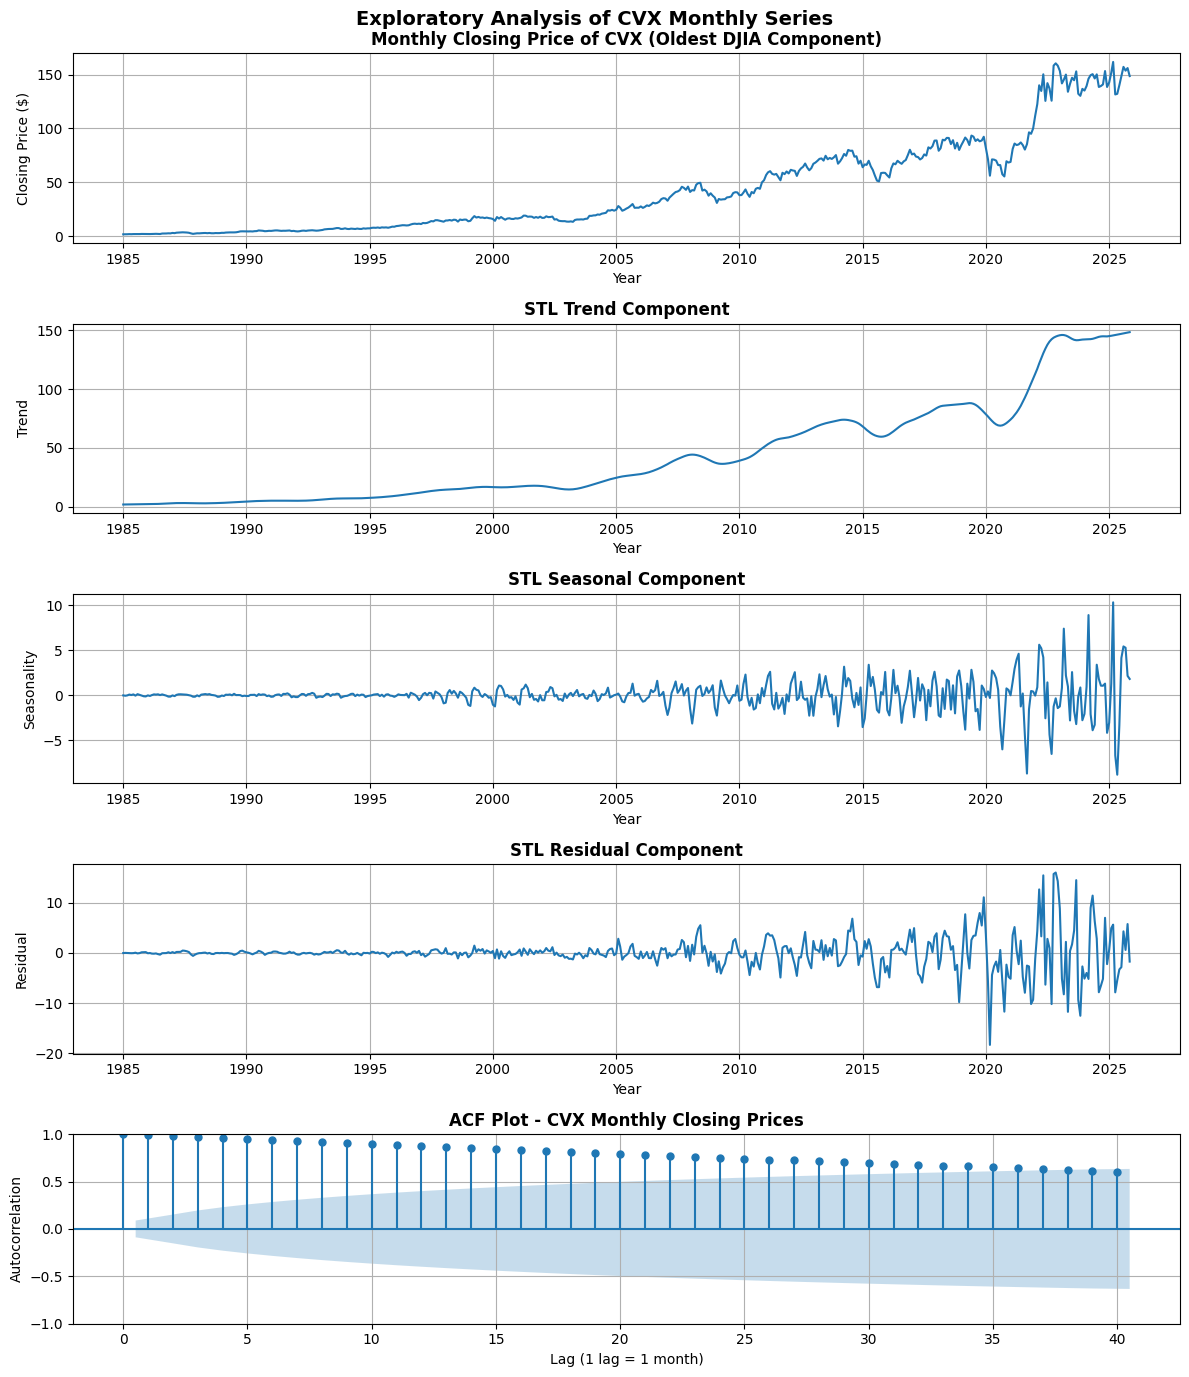

<Figure size 1000x400 with 0 Axes>

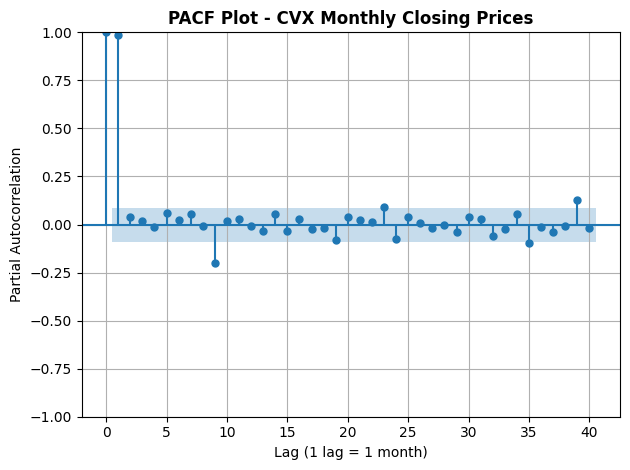


ADF Test on STL Residual Component:
{'ADF Statistic': np.float64(-5.957707929823633), 'p-value': np.float64(2.074210077453676e-07), 'lags used': 16, 'number of observations': 474, 'critical values': {'1%': np.float64(-3.4442214494657586), '5%': np.float64(-2.8676569002144148), '10%': np.float64(-2.5700280720682227)}}

Checking stationarity based on the p-value
The residual series IS stationary, we reject the null


In [46]:
# Here we study long-term trend, seasonality & behavior
# create a figure with subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 14))
fig.suptitle("Exploratory Analysis of CVX Monthly Series", fontsize=14, fontweight='bold')

#  Monthly CVX closing price

axes[0].plot(cvx_monthly)
axes[0].set_title("Monthly Closing Price of CVX (Oldest DJIA Component)",fontweight='bold')
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Closing Price ($)")
axes[0].grid()


#  STL decomposition
# here we use STL to break the series into 3 parts:
# trend, seasonality, and leftover noise (residual)
stl = STL(cvx_monthly, period=12)
res = stl.fit()

# plotting the trend
axes[1].plot(res.trend)
axes[1].set_title("STL Trend Component",fontweight='bold')
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Trend")
axes[1].grid()
#plotting the seasonality 
axes[2].plot(res.seasonal)
axes[2].set_title("STL Seasonal Component",fontweight='bold')
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Seasonality")
axes[2].grid()
# plotting to check residuals 
axes[3].plot(res.resid)
axes[3].set_title("STL Residual Component",fontweight='bold')
axes[3].set_xlabel("Year")
axes[3].set_ylabel("Residual")
axes[3].grid()

# ACF plot – check correlation structure
# here we check if there is yearly seasonality (lag 12 spike)
plot_acf(cvx_monthly, ax=axes[4], lags=40)
axes[4].set_title("ACF Plot - CVX Monthly Closing Prices",fontweight='bold')
axes[4].set_xlabel("Lag (1 lag = 1 month)")
axes[4].set_ylabel("Autocorrelation")
axes[4].grid()

plt.tight_layout()
plt.show()

# Separate PACF
plt.figure(figsize=(10,4))
plot_pacf(cvx_monthly, lags=40, method='ywm')
plt.title("PACF Plot - CVX Monthly Closing Prices",fontweight='bold')
plt.xlabel("Lag (1 lag = 1 month)")
plt.ylabel("Partial Autocorrelation")
plt.grid()
plt.tight_layout()
plt.show()



# 4. ADF on STL residual – statistical evidence for decisions


print(f"\n{BOLD}ADF Test on STL Residual Component:{END}")
result = adfuller(res.resid.dropna())

adf_dict = {
    "ADF Statistic": result[0],
    "p-value": result[1],
    "lags used": result[2],
    "number of observations": result[3],
    "critical values": result[4]
}

print(adf_dict)

# now we check stationarity using simple if/else condition
pvalue = adf_dict["p-value"]
print(f"\n{BOLD}Checking stationarity based on the p-value{END}")

if pvalue < 0.05:
    print(f"{BOLD}The residual series IS stationary, we reject the null{END}")
else:
    print("{BOLD}The residual series is NOT stationary, we fail to reject the null{END}")

# 3.3

SMA RMSE: 8.025683138551562
SMA MAE:: 6.861769358317058


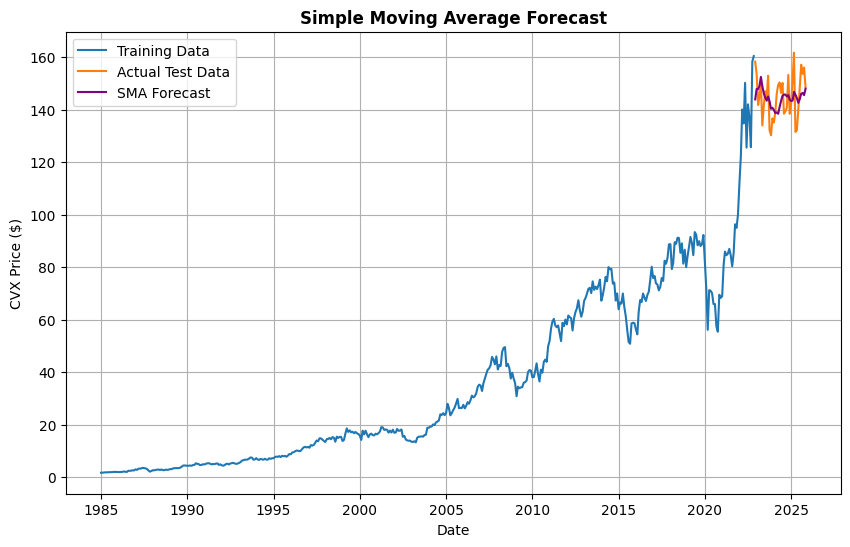

In [47]:

# SIMPLE MOVING AVERAGE (SMA)
# here we check the SMA model using same train/test split as ARIMA

test_size = 36   # 3 years of monthly data
train = cvx_monthly.iloc[:-test_size]
test  = cvx_monthly.iloc[-test_size:]

# here we choose the SMA window size like how many past months we average
window_size = 7   

# here we calculate SMA on the training data
# first few values will be NaN because SMA needs full window
train_sma = train.rolling(window=window_size).mean()

# here we prepare the data for forecasting on the test set
# we combine the last few training points with test so SMA has enough data
combined = pd.concat([train.tail(window_size - 1), test])

# now we compute SMA on this combined data
test_sma = combined.rolling(window=window_size).mean().iloc[window_size - 1:]

# set the same index as test so we can compare directly
test_sma.index = test.index

# we convert PeriodIndex to Timestamp for plotting
train_plot = train.copy()
test_plot  = test.copy()
sma_plot   = test_sma.copy()
# convert PeriodIndex to DatetimeIndex ONLY if needed
if isinstance(train_plot.index, pd.PeriodIndex):
    train_plot.index = train_plot.index.to_timestamp()

if isinstance(test_plot.index, pd.PeriodIndex):
    test_plot.index = test_plot.index.to_timestamp()

if isinstance(sma_plot.index, pd.PeriodIndex):
    sma_plot.index = sma_plot.index.to_timestamp()



# here we calculate the MAE and RMSE so we can judge how good SMA is
mse_sma = mean_squared_error(test, test_sma)
rmse_sma = np.sqrt(mse_sma)
print(f"SMA RMSE: {rmse_sma}")
mae_sma = mean_absolute_error(test, test_sma)
print(f"SMA MAE:: {mae_sma}")

#here we draw the graph to see the forecast vs actual
plt.figure(figsize=(10,6))
plt.plot(train_plot.index, train_plot, label="Training Data")
plt.plot(test_plot.index, test_plot, label="Actual Test Data")
plt.plot(sma_plot.index, sma_plot, label=f"SMA Forecast", color='purple')
plt.title("Simple Moving Average Forecast", fontweight='bold')
plt.xlabel("Date")
plt.ylabel("CVX Price ($)")
plt.legend()
plt.grid()
plt.show()

c:\Users\guyga\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\guyga\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\guyga\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    CVX   No. Observations:                  455
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1234.337
Date:                Mon, 01 Dec 2025   AIC                           2474.675
Time:                        11:29:26   BIC                           2487.029
Sample:                    01-01-1985   HQIC                          2479.542
                         - 11-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3190      0.106     -3.023      0.003      -0.526      -0.112
ma.L1          0.1362      0.106      1.282      0.200      -0.072       0.344
sigma2        13.4591      0.312     43.148      0.0

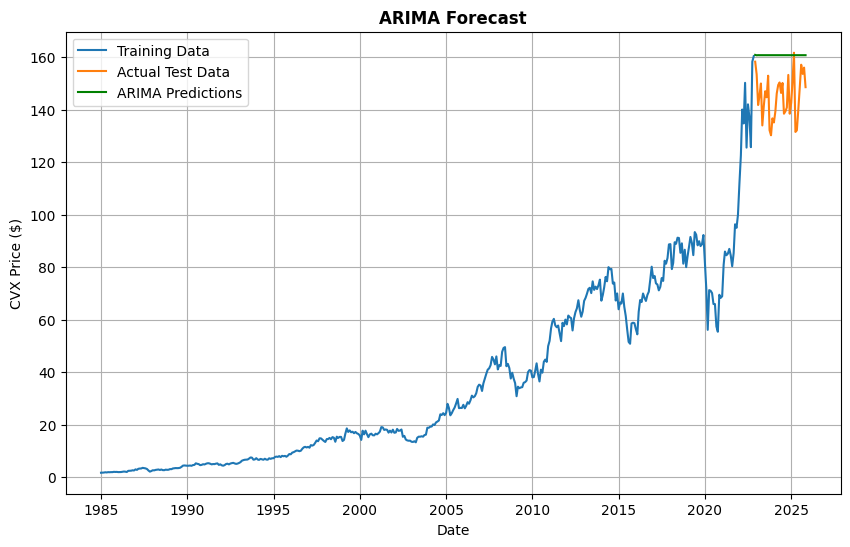

In [48]:
# ARIMA MODEL

test_size = 36  # 3 years of monthly observations as the evaluation window
train = cvx_monthly.iloc[:-test_size]
test  = cvx_monthly.iloc[-test_size:]

# Fit ARIMA model
order = (1, 1, 1)
ARIMA_model = ARIMA(train, order=order)
model_fit = ARIMA_model.fit()
print(model_fit.summary())

# Forecast over test set
start_index = len(train)           # first index of forecast period
end_index   = len(cvx_monthly) - 1 # last index of the full data series

predictions = model_fit.predict(start=start_index, end=end_index)

# Align prediction index with test index
predictions = predictions.set_axis(test.index)

# Evaluate the model
mse_ARIMA = mean_squared_error(test, predictions)
rmse_ARIMA = np.sqrt(mse_ARIMA)
print(f"RMSE: {rmse_ARIMA}")
mae_ARIMA = mean_absolute_error(test, predictions)
print(f"MAE:: {mae_ARIMA}")

train_plot = train.copy()
test_plot  = test.copy()
pred_plot  = predictions.copy()
# convert PeriodIndex to DatetimeIndex ONLY if needed
if isinstance(train_plot.index, pd.PeriodIndex):
    train_plot.index = train_plot.index.to_timestamp()

if isinstance(test_plot.index, pd.PeriodIndex):
    test_plot.index = test_plot.index.to_timestamp()

if isinstance(pred_plot.index, pd.PeriodIndex):
    pred_plot.index = pred_plot.index.to_timestamp()


# Visualize predictions vs actuals

plt.figure(figsize=(10, 6))
plt.plot(train_plot.index, train_plot, label='Training Data')
plt.plot(test_plot.index, test_plot, label='Actual Test Data')
plt.plot(pred_plot.index, pred_plot, label='ARIMA Predictions', color='green')
plt.title('ARIMA Forecast',fontweight='bold')
plt.xlabel('Date')
plt.ylabel('CVX Price ($)')
plt.legend()
plt.grid()
plt.show()

Training LSTM
Epoch 5/35, Loss: 0.094274
Epoch 10/35, Loss: 0.058042
Epoch 15/35, Loss: 0.040363
Epoch 20/35, Loss: 0.044190
Epoch 25/35, Loss: 0.037092
Epoch 30/35, Loss: 0.034985
Epoch 35/35, Loss: 0.032340
LSTM RMSE: 90.57968427079331
LSTM MAE:: 90.1993236541748


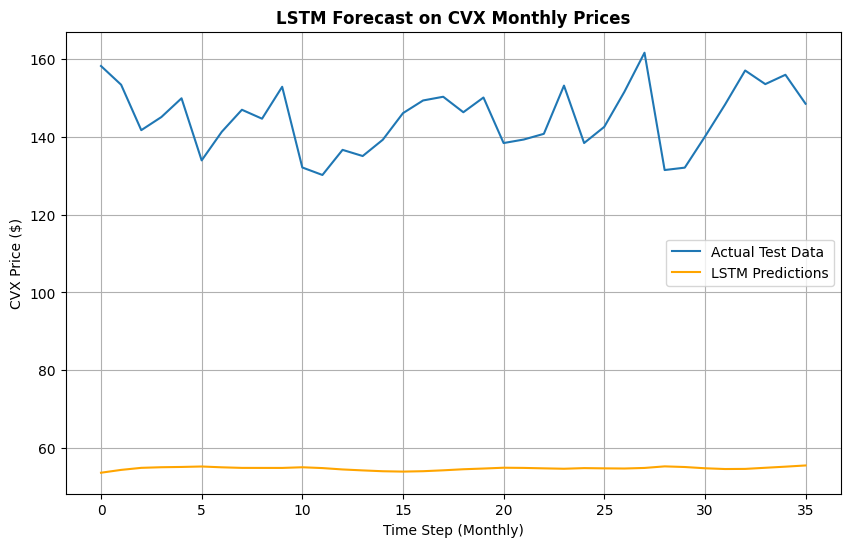

In [58]:

#  LSTM neural network 


# here we fix seeds so results stay the same

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# here we prepare the CVX monthly data

series = cvx_monthly.values.reshape(-1,1)

# same train/test split as other models
test_size = 36
train = series[:-test_size]
test  = series[-test_size:]


# here we scale the whole dataset for LSTM

scaler = MinMaxScaler(feature_range=(0,1))
scaled_all = scaler.fit_transform(series)

look_back = 60  # how many past points we look at

# we also scale some extra values for the test windows
scaled_test = scaled_all[-(test_size + look_back):]

# here we create training sequences 

X_train = []
y_train = []

i = look_back          # start index
limit = len(scaled_all) - test_size

while i < limit:
    window = scaled_all[i - look_back:i, 0]   # last 60 points
    target = scaled_all[i, 0]                 # next point

    X_train.append(window)
    y_train.append(target)

    i += 1

X_train = np.array(X_train)
y_train = np.array(y_train)

# here we create test sequences 

X_test = []
y_test = []

j = look_back
limit_test = len(scaled_test)

while j < limit_test:
    window = scaled_test[j - look_back:j, 0]
    target = scaled_test[j, 0]

    X_test.append(window)
    y_test.append(target)

    j += 1

X_test = np.array(X_test)
y_test = np.array(y_test)


# here we reshape for LSTM input

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0],  X_test.shape[1],  1)

X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
X_test_torch  = torch.tensor(X_test, dtype=torch.float32)


# here we build the LSTM model 

class MyLSTM(nn.Module):
    def __init__(self):
        super(MyLSTM, self).__init__()
        
        self.lstm1 = nn.LSTM(input_size=1, hidden_size=50, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=50, hidden_size=50, batch_first=True)
        
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        out,_ = self.lstm1(x)
        out,_ = self.lstm2(out)
        out = out[:,-1,:]      # last timestep
        out = self.fc(out)
        return out

# here we create the model

model = MyLSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# here we train the LSTM 

epochs = 35
print("Training LSTM")

epoch = 0
while epoch < epochs:

    model.train()
    optimizer.zero_grad()

    output = model(X_train_torch)
    loss = criterion(output, y_train_torch)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")
    
    epoch += 1

# here we do predictions

model.eval()
with torch.no_grad():
    y_pred_scaled = model(X_test_torch).numpy()

# inverse scale
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test.reshape(-1,1))


# here we compute RMSE

rmse_lstm = np.sqrt(mean_squared_error(y_test_original, y_pred))
print(f"LSTM RMSE: {rmse_lstm}")
mae_lstm = mean_absolute_error(y_test_original, y_pred)
print(f"LSTM MAE:: {mae_lstm}")
# here we plot actual vs predictions

plt.figure(figsize=(10,6))
plt.plot(y_test_original, label="Actual Test Data")
plt.plot(y_pred, label="LSTM Predictions", color='orange')
plt.title("LSTM Forecast on CVX Monthly Prices", fontweight='bold')
plt.xlabel("Time Step (Monthly)")
plt.ylabel("CVX Price ($)")
plt.legend()
plt.grid()
plt.show()


C:\Users\guyga\AppData\Local\Temp\ipykernel_5196\2648815920.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(start=start_next, periods=12, freq='M')


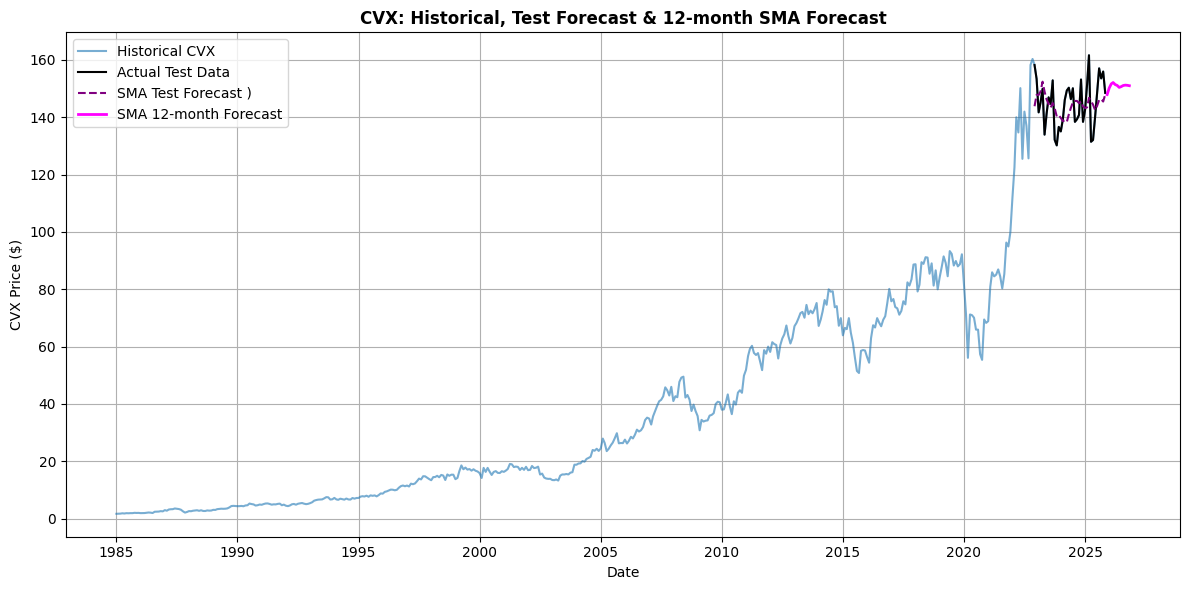


SMA 12-month forecast (date : value):
2025-11: 147.95
2025-12: 150.21
2026-01: 151.66
2026-02: 152.14
2026-03: 151.43
2026-04: 151.13
2026-05: 150.44
2026-06: 150.71
2026-07: 151.10
2026-08: 151.23
2026-09: 151.17
2026-10: 151.03


In [50]:
#Using the best model, let us forecast the trend for the next year. The best model is SIMPLE MOVING AVERAGE (SMA)

# Now we are going to forecast the  next 12 months using SMA 

# here we form the full history to base forecasts on 
our_history = cvx_monthly.copy().astype(float).values.flatten().tolist()

# if index is PeriodIndex, convert last date to timestamp for future index creation
if isinstance(cvx_monthly.index, pd.PeriodIndex):
    last_timestamp = cvx_monthly.index[-1].to_timestamp()
else:
    last_timestamp = pd.to_datetime(cvx_monthly.index[-1])

# here we build future datetime index (12 months ahead)
from pandas.tseries.offsets import MonthEnd
start_next = last_timestamp + MonthEnd(1)
future_index = pd.date_range(start=start_next, periods=12, freq='M')

# here we do iterative SMA forecasting where we used the last window_size values including previous forecasts
future_forecasts = []
count = 0
while count < 12:
    if len(our_history) >= window_size:
        next_val = float(np.mean(our_history[-window_size:]))
    else:
        next_val = float(np.mean(our_history))   # here there is fallback if not enough history

    future_forecasts.append(next_val)
    our_history.append(next_val)   # here we add forecast to history for next iteration
    count += 1

# create forecast series with future index
sma_future_series = pd.Series(future_forecasts, index=future_index)

# convert full series index for plotting 
full_plot = cvx_monthly.copy()
if isinstance(full_plot.index, pd.PeriodIndex):
    full_plot.index = full_plot.index.to_timestamp()

# here we plot historical series + test + 12-month SMA forecast
plt.figure(figsize=(12,6))
plt.plot(full_plot.index, full_plot, label="Historical CVX", alpha=0.6)
plt.plot(test_plot.index, test_plot, label="Actual Test Data", color='black')
plt.plot(sma_plot.index, sma_plot, label=f"SMA Test Forecast )", color='purple', linestyle='--')
plt.plot(sma_future_series.index, sma_future_series.values, label="SMA 12-month Forecast", color='magenta', linewidth=2)
plt.title("CVX: Historical, Test Forecast & 12-month SMA Forecast", fontweight='bold')
plt.xlabel("Date")
plt.ylabel("CVX Price ($)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# here we print the 12-month forecast values for the report
print("\nSMA 12-month forecast (date : value):")
i = 0
while i < sma_future_series.size:
    print(f"{sma_future_series.index[i].strftime('%Y-%m')}: {sma_future_series.iloc[i]:.2f}")
    i += 1
